In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
import json
from math import ceil, log2
import plotly.express as px
from util import *
from stats import *

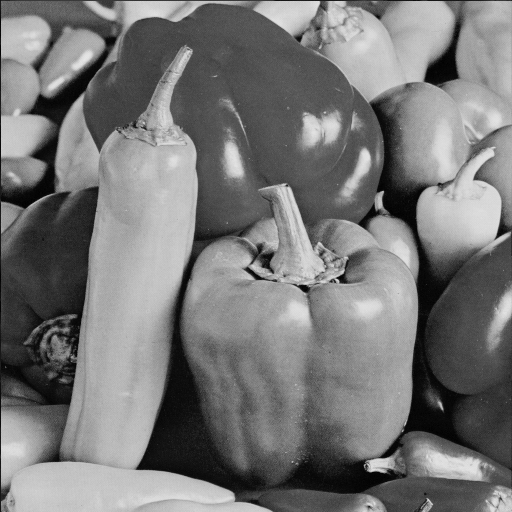

In [3]:
filename = 'images/peppers.bmp'
image = pil.Image.open(filename)
image

In [4]:
array = np.asarray(image)
array

array([[ 21,  40,  43, ...,  52,  56,  39],
       [ 26, 113, 106, ..., 183, 170, 168],
       [ 27, 116, 109, ..., 180, 180, 170],
       ...,
       [ 20, 128, 137, ..., 203, 200, 190],
       [ 20, 123, 113, ..., 200, 197, 168],
       [ 20,  84, 130, ..., 188, 196, 197]], dtype=uint8)

# CIQA

In [5]:
import ciqa

[[ 28  28  28 ...  76  76  27]
 [ 28 137  83 ... 174 174 174]
 [ 28 137  83 ... 174 174 174]
 ...
 [ 35 142 142 ... 201 201 201]
 [ 35 142  88 ... 201 201 148]
 [ 35  88 142 ... 201 201 201]]


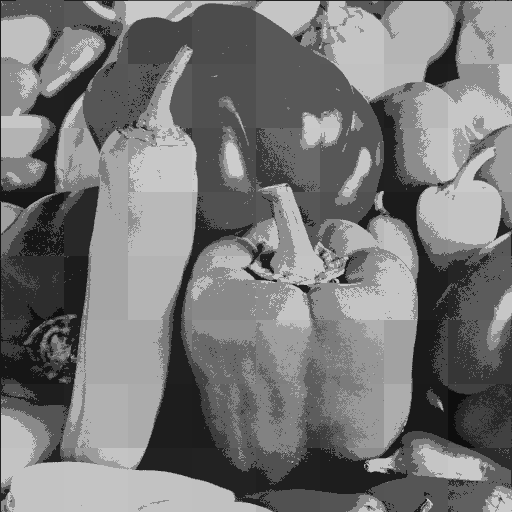

In [6]:
block_size = 512 // 8
levels = 4
data = ciqa.compress(array, block_size, levels)
decompressed = ciqa.decompress(data)
print(decompressed)
pil.Image.fromarray(decompressed)

In [7]:
def compare_ciqa(image, block_size, levels) -> float:
    original = np.asarray(image)
    data = ciqa.compress(original, block_size, levels)
    decompressed = ciqa.decompress(data)
    return mse(original, decompressed)

In [8]:
block_sizes = np.array([4,8,16,32]) # N
levels = np.array([2,4,8,6])        # M

mse_data = np.array([(x,y,compare_ciqa(image, x, y)) for x in block_sizes for y in levels])
mse_data

xs = np.array([t[0] for t in mse_data])
ys = np.array([t[1] for t in mse_data])
zs = np.array([t[2] for t in mse_data])

labels = {'x':'Block Size (N)', 'y':'Levels (M)', 'z': 'MSE'}
fig = px.scatter_3d(x=xs, y=ys, z=zs, labels=labels)
fig.show()

# CIVQ

In [9]:
import civq
from scipy.cluster.vq import kmeans, kmeans2, whiten

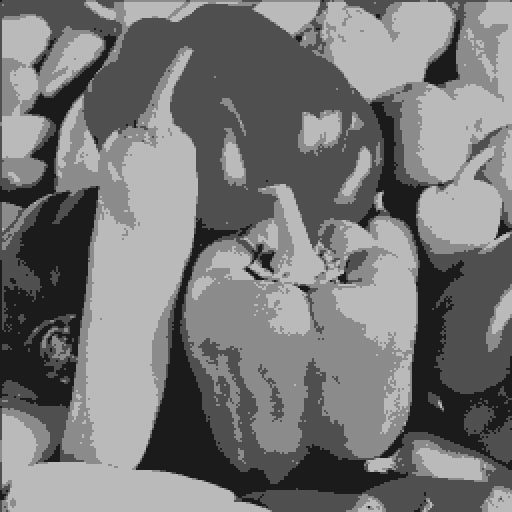

In [10]:
k = 4
block_size = 2
data = civq.compress(array, block_size, k)
decompressed = civq.decompress(data)
pil.Image.fromarray(decompressed)

In [11]:
def compare_civq(image, block_size, levels) -> float:
    original = np.asarray(image)
    data = civq.compress(original, block_size, levels)
    decompressed = civq.decompress(data)
    return mse(original, decompressed)

In [17]:
block_sizes = np.array([4,8,16,32]) # N
levels = np.array([2,4,8,6])        # K

mse_data = np.array([(x,y,compare_civq(image, x, y)) for x in block_sizes for y in levels])
mse_data

xs = np.array([t[0] for t in mse_data])
ys = np.array([t[1] for t in mse_data])
zs = np.array([t[2] for t in mse_data])

labels = {'x':'Block Size (N)', 'y':'Levels (M)', 'z': 'MSE'}
fig = px.scatter_3d(x=xs, y=ys, z=zs, labels=labels)
fig.show()

# CIMAP

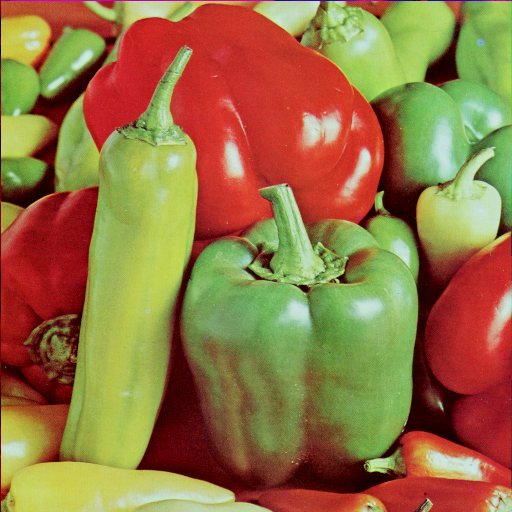

In [18]:
# cimap
import cimap
filename = 'images/peppers_colour.bmp'
color_image = pil.Image.open(filename)
color_image

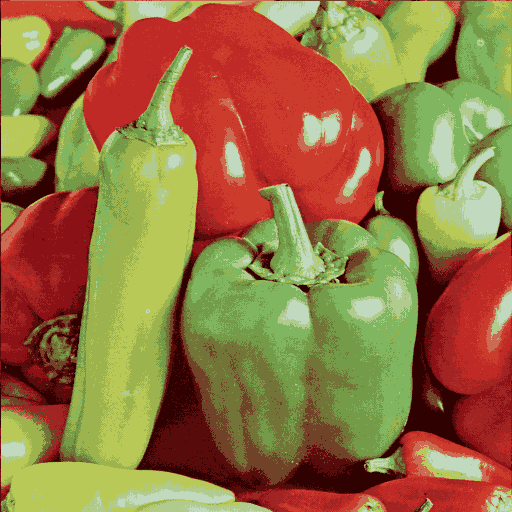

In [19]:
color_array = np.asarray(color_image)
k = 16
data = cimap.compress(color_array, k)
decompressed = cimap.decompress(data)
pil.Image.fromarray(decompressed)

In [15]:
def compare_cimap(image, k) -> float:
    original = np.asarray(image)
    data = cimap.compress(original, k)
    decompressed = cimap.decompress(data)
    return mse(original, decompressed)

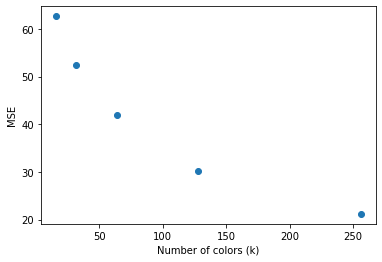

In [20]:
ks = np.array([16, 32, 64, 128, 256])

mse_data = np.array([(k,compare_cimap(color_image, k)) for k in ks])
mse_data

xs = np.array([t[0] for t in mse_data])
ys = np.array([t[1] for t in mse_data])

plt.xlabel('Number of colors (k)')
plt.ylabel('MSE')
plt.scatter(xs, ys)
plt.show()

# Dithering

In [21]:
import dithering

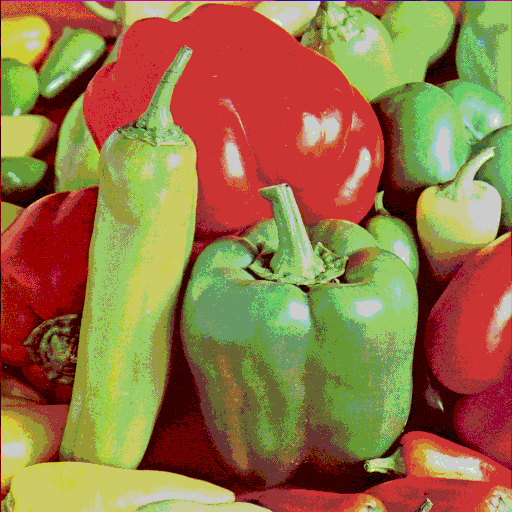

In [23]:
dithered = np.copy(color_array)
dithering.dither(dithered)
pil.Image.fromarray(dithered)